# Libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp
import pandas as pd

# Matplotlib 
%matplotlib inline

# Seabron
sns.set(rc={'figure.figsize':(16,10)})
sns.set_style('whitegrid')

# Sympy
x = sp.symbols('x')

# Machine Learnging
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Loading the Data

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

- "se" : standard error for the mean of distances from center to points on the perimeter
- "worst": or largest mean value for mean of distances from center to points on the perimeter

# Feature Engeneering

Since the 'id' is not important for the NN to be developed, it will be removed from the dataframe. Being:
- M = 1
- B = 0

In [3]:
df.drop('id', axis=1, inplace=True)

The dummy variables will also be used to transform the 'diagnosis' category from a string data type to an int type, so that the NN can work with it.

In [4]:
diag = pd.get_dummies(data=df['diagnosis'], drop_first=True)

df.drop('diagnosis', axis=1, inplace=True)

df = pd.concat([df,diag], axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# Data Preparation

## Separation of features from the target class

In [5]:
X = df.drop('M', axis=1)
y = df['M']

## Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
scaler = MinMaxScaler() # Create a variable for the scaling

scaler.fit(X_train) # Fit the train data from the previus split to the scaler

X_train = scaler.transform(X_train) # Recreate the X_train to the scaled X_train and perform the transformation

X_test = scaler.transform(X_test)

X_train.max() # Test

1.0

# Creating the NN

In [19]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [50]:
model = Sequential()

model.add(Dense(30,activation='relu')) # Input layer
model.add(Dropout(0.5))

model.add(Dense(10,activation='relu')) # Hidden layer
model.add(Dropout(0.45))

model.add(Dense(8,activation='relu')) # Hidden layer
model.add(Dropout(0.3))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid')) # Output layer

model.compile(loss='binary_crossentropy', optimizer='adam') # Compiler

# Run
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), 
         callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 5ms/step - loss: 0.7160 - val_loss: 0.6891
Epoch 2/600
13/13 [==============================] - 0s 1ms/step - loss: 0.7006 - val_loss: 0.6833
Epoch 3/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6873 - val_loss: 0.6783
Epoch 4/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6823 - val_loss: 0.6700
Epoch 5/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6675 - val_loss: 0.6584
Epoch 6/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6544 - val_loss: 0.6501
Epoch 7/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6630 - val_loss: 0.6415
Epoch 8/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6405 - val_loss: 0.6337
Epoch 9/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6385 - val_loss: 0.6265
Epoch 10/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6361 - val_loss: 0.6168
Epoch 11/

13/13 [==============================] - 0s 2ms/step - loss: 0.1811 - val_loss: 0.1285
Epoch 84/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1651 - val_loss: 0.1276
Epoch 85/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1535 - val_loss: 0.1301
Epoch 86/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1692 - val_loss: 0.1226
Epoch 87/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1777 - val_loss: 0.1215
Epoch 88/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1647 - val_loss: 0.1402
Epoch 89/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1770 - val_loss: 0.1316
Epoch 90/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1757 - val_loss: 0.1337
Epoch 91/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1775 - val_loss: 0.1267
Epoch 92/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1857 - val_loss: 0.1246
Epoch 93/600


<AxesSubplot:>

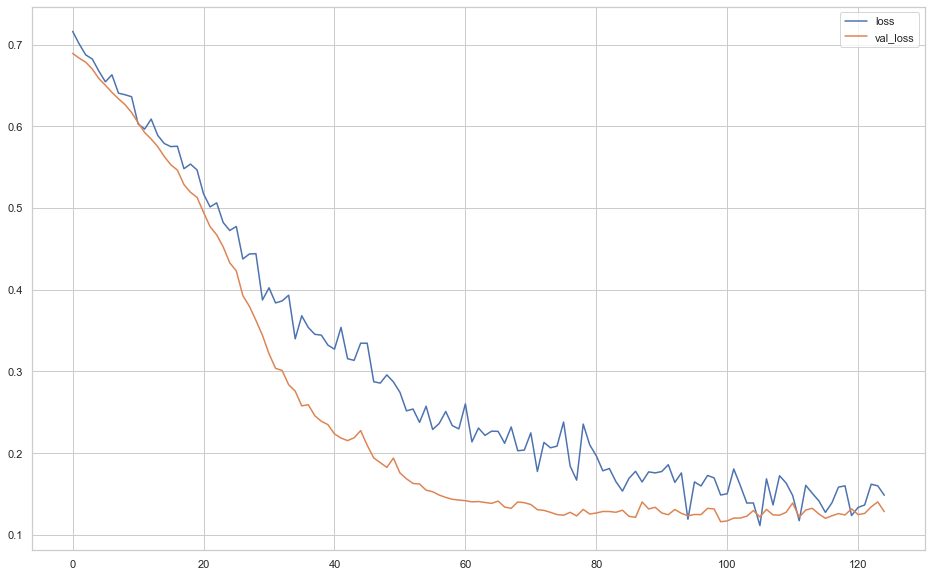

In [51]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [52]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       105
           1       0.97      0.97      0.97        66

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[103   2]
 [  2  64]]


In [53]:
from tensorflow.keras.models import load_model

model.save('breastCancerNN.h5')